In [6]:
import sys
sys.path.append("../Simulations/")

import numpy as np
import matplotlib.pyplot as plt
from tqdm import *
from scipy.integrate import nquad, quad
from scipy.interpolate import interp1d
from scipy.special import erf, jn, jv, kn
import mpmath as mp
from skmonaco import mcimport, mcquad, mcmiser

from units import *
from spec_calc import PowerSpectra, PowerSpectraPopulations

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
pspec = PowerSpectra(precompute=['NFW', 'Burk'])

Loading Burkert parameters
Loading NFW parameters


# Single subhalo

In [8]:
l_min = 1
l_max = 500
n_l = 50
l_ary = np.logspace(np.log10(l_min), np.log10(l_max), n_l)

In [9]:
M0 = 10**8*M_s
R0 = pspec.R0_VL(M0)
Dl = 10*kpc
v = 1e-3

In [10]:
Cl_NFW_ary = np.array([pspec.Cl_NFW(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_Burk_ary = np.array([pspec.Cl_Burk(M0, Dl, v, l) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=15) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2
Cl_tNFW2_ary = np.array([pspec.Cl_tNFW(M0, Dl, v, l, tau=10) for l in tqdm_notebook(l_ary)])/(1e-6*asctorad/Year)**2

In [11]:
Cl_Plummer_ary = pspec.Cl_Plummer(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Gauss_ary = pspec.Cl_Gauss(R0, M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;
Cl_Point_ary = pspec.Cl_Point(M0, Dl, v, l_ary)/(1e-6*asctorad/Year)**2;

/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/scratch/sm8383/anaconda3/envs/venv_smsharma/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


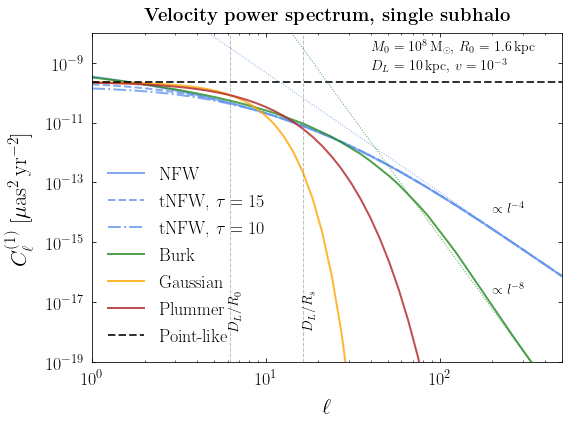

In [12]:
plt.figure(figsize=(8,6))
plt.plot(l_ary, Cl_NFW_ary, label="NFW", alpha=0.8, c='cornflowerblue')
plt.plot(l_ary, Cl_tNFW_ary, label="tNFW, $\\tau = 15$", alpha=0.8, ls='--', c='cornflowerblue')
plt.plot(l_ary, Cl_tNFW2_ary, label="tNFW, $\\tau = 10$", alpha=0.8, ls='-.', c='cornflowerblue')
plt.plot(l_ary, Cl_Burk_ary, label="Burk", alpha=0.8,c='forestgreen')
plt.plot(l_ary, Cl_Gauss_ary, label="Gaussian", alpha=0.8, c='orange')
plt.plot(l_ary, Cl_Plummer_ary, label="Plummer", alpha=0.8, color='firebrick')
plt.plot(l_ary, len(l_ary)*[Cl_Point_ary], label="Point-like", c='k', ls='--', alpha=0.8)

plt.axvline((1/(R0/Dl)), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(R0/Dl)),1e-17,'$D_L/R_0$',rotation=90, fontsize=14)

plt.axvline(1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl), c='grey', lw=1, alpha=0.5, ls='--')
plt.text((1/(pspec.get_rs_rhos_NFW(M0)[0]/Dl)),1e-17,'$D_L/R_s$',rotation=90, fontsize=14)

n = 4
plt.plot(l_ary, (1/l_ary**n)*Cl_NFW_ary[-1]/(1/(l_ary**n)[-1]), lw=1, alpha=0.8, ls='dotted', c='cornflowerblue')

n = 8
l_base = 2000
fac = pspec.Cl_Burk(M0, Dl, v, l_base)/(1e-6*asctorad/Year)**2/(1/(l_base**n))
plt.plot(l_ary, (1/l_ary**n)*fac, lw=1, alpha=0.8, ls='dotted',c='forestgreen')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\ell$")
plt.ylabel("$C_\ell^{(1)}$ [$\mu$as$^2$\,yr$^{-2}$]")


plt.xlim(l_min, l_max)
plt.ylim(1e-19,1e-8)

plt.title('\\textbf{Velocity power spectrum, single subhalo}', fontsize=18.5, y=1.02)
plt.text(40, 2.3e-9,'$M_0 = 10^8\,$M$_\odot$, $R_0$ = ' + str(R0/kpc)[:3] + '\,kpc', fontsize=14)
plt.text(40, 5e-10,'$D_L$ = 10\,kpc, $v=10^{-3}$', fontsize=14)

plt.text(200, 1e-14,'$\propto l^{-4}$', fontsize=14)
plt.text(200, 2e-17,'$\propto l^{-8}$', fontsize=14)

plt.legend(frameon=False)

plt.tight_layout()
# plt.savefig("single_sub.pdf")

# Populations

In [13]:
pspecpop = PowerSpectraPopulations()

Loading Burkert parameters
Loading NFW parameters
Calculating velocity integrals


In [14]:
pspecpop.set_mass_distribution(pspecpop.rho_M_SI, f_DM=0.5, M_min=1e5*M_s, M_max=1e10*M_s)
pspecpop.set_radial_distribution(pspecpop.r2rho_V_ein_EAQ, R_min=1*kpc, R_max=200*kpc)
pspecpop.set_subhalo_properties(pspecpop.c200_Moline)

In [15]:
pspecpop.get_C_l_total_ary()

In [16]:
sigma_mu = 1
sigma_alpha = .1
N_q = 1e9

(1e-10, 0.1)

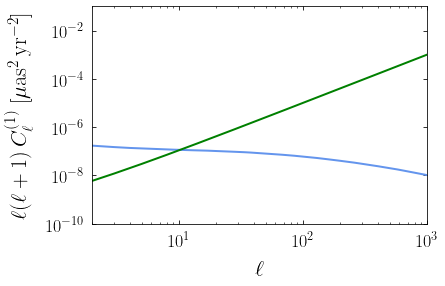

In [28]:
plt.plot(pspecpop.l_ary, pspecpop.l_ary*(pspecpop.l_ary + 1)*pspecpop.C_l_ary)
plt.plot(pspecpop.l_ary, pspecpop.l_ary*(pspecpop.l_ary + 1)*np.ones_like(pspecpop.l_ary)*sigma_mu**2/N_q, color='green')

plt.yscale("log")
plt.xscale("log")

plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell+1)\,C_\ell^{(1)}$ [$\mu$as$^2$\,yr$^{-2}$]")

plt.xlim(2, 1000)
plt.ylim(1e-10,1e-1)



# Fisher Forecasts

In [29]:
from astrometry_forecast import Parameter, AstrometryObservation, FisherForecast

In [32]:
fDM = Parameter('fDM', 0.5 ,0.02 , True, pspecpop.C_l_ary*(1 + 0.02), pspecpop.C_l_ary*(1 - 0.02), 
                None, None, '$\\f_\mathrm{DM}$' )

parameters = [pspecpop.C_l_ary, None, 1, 2000, fDM]
observation = AstrometryObservation(fsky=1, sigma_mu=sigma_mu, sigma_alpha=None, N_q=N_q, l_min_mu=10, l_max_mu=2000, l_min_alpha=10, l_max_alpha=2000)

fshr = FisherForecast(parameters, observation)

0.19882489943047849
